## 4.2 손실 함수

 신경망 학습에서 사용하는 지표는 **손실 함수**라고 한다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

### 4.2.1 평균 제곱 오차 (mean square error, MSE)

#### 가장 많이 쓰이는 손실 함수

- $y_k$ = 신경망의 출력(추정)
- $t_k$ = 정답 레이블
- k - 데이터 차원 수 (e.g. 0~9인 숫자를 one-hot-encoding 인 경우 k = 10)

$$
E = \frac{1}{2}\sum_k (y_k - t_k)^2
$$

In [8]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 0 확률, 1 확률, 2 확률, ...
t = [0, 0 ,1, 0, 0, 0, 0, 0, 0, 0]  # 정답 레이블

**평균 제곱 오차를 파이썬으로 구현**

In [7]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [12]:
# 정답은 '2'
t = [0, 0 ,1, 0, 0, 0, 0, 0, 0, 0]


# 예제 1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [14]:
# 예제 2 : '7'이 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

- 예제 1(정답)의 MSE : 0.09750000000000003
- 예제 2(오답)의 MSE : 0.5975

이 실험의 결과로 정답인 경우의 손실 함수의 출력이 작으며, 평균 제곱 오차를 기준으로 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다.

### 4.2.2 교차 엔트로피 오차(cross entropy error, CEE)

#### 수식

- $\log$ : 밑이 $e$인 자연로그 ($\log_e$)
- $y_k$ : 신경망의 출력
- $t_k$ : 정답 레이블 (정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 [one-hot-encoding))

$$
E = - \sum_k t_k \log y_k
$$

예를 들어 정답 레이블은 '2'가 정답이라 하고 이때의 신경망 출력이 0.6이면 교차 엔트로피 오차는 $-1 \times \log(0.6)$ = 0.51 이다. 또한 같은 조건에서의 신경망 출력이 0.1이라면 $-1 \times \log(0.1)$ = 2.30 이다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다. 

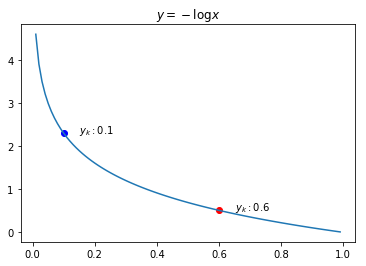

In [49]:
import matplotlib.pyplot as plt

data = np.arange(0.01, 1, 0.01)

plt.plot(data, -np.log(data))
plt.scatter(0.6, -np.log(0.6), c = 'r')
plt.text(0.65, -np.log(0.6), r'$y_k : 0.6 $')
plt.scatter(0.1, -np.log(0.1), c = 'b')
plt.text(0.15, -np.log(0.1), r'$y_k : 0.1$')
plt.title("$y = - \logx$")
plt.show()

정답에 해당에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다. 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

교차 엔트로피를 직접 구현해보자.

In [52]:
def cross_entoropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta)) # -inf 방지..

In [61]:
# 정답은 '2'
t = [0, 0 ,1, 0, 0, 0, 0, 0, 0, 0]

# 예제 1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entoropy_error(np.array(y), np.array(t))

0.510825457099338

In [62]:
# 예제 2 : '7'이 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entoropy_error(np.array(y), np.array(t))

2.302584092994546

- 예제 1(정답)의 CEE : 0.510825457099338
- 예제 2(오답)의 CEE : 2.302584092994546

이 실험의 결과로 정답인 경우의 손실 함수의 출력이 작으며, 크로스 엔트로피를 기준으로 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다.

### 4.2.3 미니배치 학습

지금까지 위에서 보았던 손실함수 수식은 단일 데이터에만 해당하는 수식이다. 다수의 훈련 데이터를 가지고 손실함수의 합을 구하는 방법을 알아보자.

#### 수식

**평균 손실 함수**

- $\log$ : 밑이 $e$인 자연로그 ($\log_e$)
- $y_{nk}$ : N번째 데이터 입력의 신경망의 출력
- $t_{nk}$ : N번째 데이터의 정답 레이블 (정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 [one-hot-encoding))


$$
E = - \frac{1}{N} \sum_{n}\sum_{k} t_{nk} \log y_{nk}
$$

In [88]:
import sys, os
sys.path.append('C:/Users/lhj91/Git/deep-learning-from-scratch-1')
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


훈련 데이터에서 무작위로 10장만 빼내는 python 코드

In [92]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 중복 조심..
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [97]:
np.random.choice(60000, 10)

array([13098, 36540, 15481, 37054, 52495, 15824,  5880,  6252, 19804,
        7299])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [99]:
# 데이터 하나당 교차 엔트로피 구하는 경우!
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size

In [178]:
# 데이터 다수(배치)의 교차 엔트로피 구하는 경우, + 데이터 하나당 교차 엔트로피 구하는 경우 (범용적)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

- np.arange(batch_size) : 0 부터 batch_size - 1까지의 배열을 생성
- batch_size가 5이면 0~4라는 넘파이 배열을 생성
- t : [2, 7, 0, 9, 4]
- y[np.arange(batch_size), t] : [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]] 인 배열을 생성

In [165]:
t = [0, 2, 4]
y = np.array([[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
             ,[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
             ,[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

In [171]:
batch_size = 3

In [172]:
y[np.arange(batch_size), t]

array([0.1 , 0.1 , 0.05])

In [175]:
np.log(y[np.arange(batch_size), t] + 1e-7)

array([-2.30258409, -2.30258409, -2.99573027])

In [179]:
-np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

2.5336328198483606

### 4.2.5 왜 손실 함수를 설정하는가?

왜 굳이 손실 함수를 사용해야 하는걸까? 정확도가 아닌 손실함수를 우회적으로 방법을 택한 이유는 무엇일까?

이 의문은 신경망 학습에서의 '미분'의 역할에 주목하면 해결됩니다. 자세한 것은 다음 절에 설명한다. 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾는 것이다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

단적으로 정확도를 지표로 삼는 경우 미분하면 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없다.

